In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The objective is to predict the GO terms of the proteins given, and one protein could have more than one term, 
hence the task is multi-label classification at hand.

In [22]:
df = pd.read_csv('data_proten.csv')

In [23]:
df[df['EntryID']=='A0A009IHW8']

,EntryID,term,aspect,Seq
0,A0A009IHW8,GO:0008152,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
1,A0A009IHW8,GO:0034655,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
2,A0A009IHW8,GO:0072523,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
3,A0A009IHW8,GO:0044270,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
4,A0A009IHW8,GO:0006753,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
5,A0A009IHW8,GO:1901292,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
6,A0A009IHW8,GO:0044237,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
7,A0A009IHW8,GO:1901360,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
8,A0A009IHW8,GO:0008150,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
9,A0A009IHW8,GO:1901564,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...


Implying Protein Embeddings

In [26]:
#The DNN model needs to be trained on AA sequences, which is not possible w/o introducing protein embeddings
# Protein embeddings converts amino acid sequences in a vector format
# converting it in a vector format makes it easier for the machine to understand the structural and functional 
# properties of the protein

protein embeddings

In [27]:


train_protein_ids = np.load('train_ids.npy')
print(train_protein_ids.shape)
#Contains all the protein ID'S along with their vector format



(142246,)


In [34]:
x = list(train_protein_ids)

In [45]:
train_embeddings = np.load('train_embeds.npy')

In [46]:
train_embeddings

array([[ 0.04948843, -0.03293516,  0.03247323, ..., -0.04353154,
         0.0964628 ,  0.07306959],
       [-0.04461636,  0.06492499, -0.08026284, ...,  0.02672353,
         0.02787905, -0.04842958],
       [-0.02012804, -0.04977943,  0.00789446, ..., -0.03610279,
         0.00769301,  0.10623412],
       ...,
       [ 0.01691809,  0.04133058,  0.00079253, ...,  0.0088079 ,
         0.00648063, -0.01334958],
       [ 0.06125151,  0.08340203,  0.0440247 , ...,  0.00138361,
        -0.04754627,  0.01012351],
       [ 0.02160021,  0.06516985,  0.07492343, ...,  0.0496657 ,
        -0.01987522,  0.04471432]])

In [47]:
column_num = train_embeddings.shape[1]
train_df = pd.DataFrame(train_embeddings, columns = ["Column_" + str(i) for i in range(1, column_num+1)])
print(train_df.shape)

(142246, 1024)


In [48]:
train_df
#contains the vector representation of all the proteins given

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_1015,Column_1016,Column_1017,Column_1018,Column_1019,Column_1020,Column_1021,Column_1022,Column_1023,Column_1024
0,0.049488,-0.032935,0.032473,-0.033723,-0.059505,0.075936,-0.045860,-0.104476,-0.072112,0.038806,...,-0.046516,-0.028773,-0.021878,-0.097883,0.056475,0.080950,-0.020938,-0.043532,0.096463,0.073070
1,-0.044616,0.064925,-0.080263,-0.075338,-0.004731,0.025408,-0.024685,-0.016568,-0.038980,-0.033870,...,-0.040173,0.003925,0.006130,0.007362,-0.066848,0.106882,-0.030134,0.026724,0.027879,-0.048430
2,-0.020128,-0.049779,0.007894,-0.000829,-0.047737,0.086453,-0.038107,-0.036379,0.029611,0.045029,...,0.029388,0.008456,0.000697,0.013502,-0.005968,-0.011571,0.005704,-0.036103,0.007693,0.106234
3,-0.007515,0.060628,0.004045,0.027056,-0.021542,0.010380,-0.025064,-0.055834,0.068238,0.027764,...,0.020792,0.023307,0.009009,0.018211,0.020820,-0.031738,0.013279,-0.018357,0.008087,0.010917
4,0.013468,0.041516,0.018435,-0.035595,0.008770,0.018699,-0.015452,-0.038092,-0.038326,-0.012299,...,-0.044742,-0.025432,-0.060886,-0.026915,0.026342,0.017237,0.014731,-0.016861,-0.016272,0.037054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142241,0.032529,0.032490,0.026844,0.007486,-0.019346,0.033527,0.048294,-0.091146,0.007092,0.008843,...,-0.038719,-0.037237,-0.022644,-0.055443,0.002142,0.006521,-0.026665,-0.002415,0.016886,0.004104
142242,0.056026,0.035470,0.021987,0.028443,-0.001087,0.020100,-0.010549,-0.049460,0.027347,-0.028113,...,-0.020552,-0.030632,-0.038549,-0.011747,0.060145,0.003906,-0.031132,0.003377,-0.027095,-0.015910
142243,0.016918,0.041331,0.000793,-0.005990,-0.039993,0.056007,-0.013786,-0.076081,0.006320,-0.002054,...,-0.029348,-0.037351,0.008763,-0.051209,0.028266,0.009462,0.019854,0.008808,0.006481,-0.013350
142244,0.061252,0.083402,0.044025,0.047916,0.024477,0.035183,-0.016680,-0.043163,-0.045596,-0.029994,...,-0.014085,0.020183,-0.066376,0.058274,0.056035,-0.002282,-0.013941,0.001384,-0.047546,0.010124


In [49]:
#This was how we prepared the protein embeddings, next, we will prepare the dataset

In [52]:
df['term'].count()

5363863

In [53]:
#checking for duplicates
x = list(df['term'])

In [65]:
def countt(x):
    count = 0
    for i in x:
        count = count + 1
    print(count)
        

In [68]:
countt(x)

5363863


In [70]:
countt(y)

31466


In [71]:
# A total of 5363863 GO ID'S are there, out of which, 31,466 are unique

In [73]:
#Plotting the most frequently occuring GO ID'S

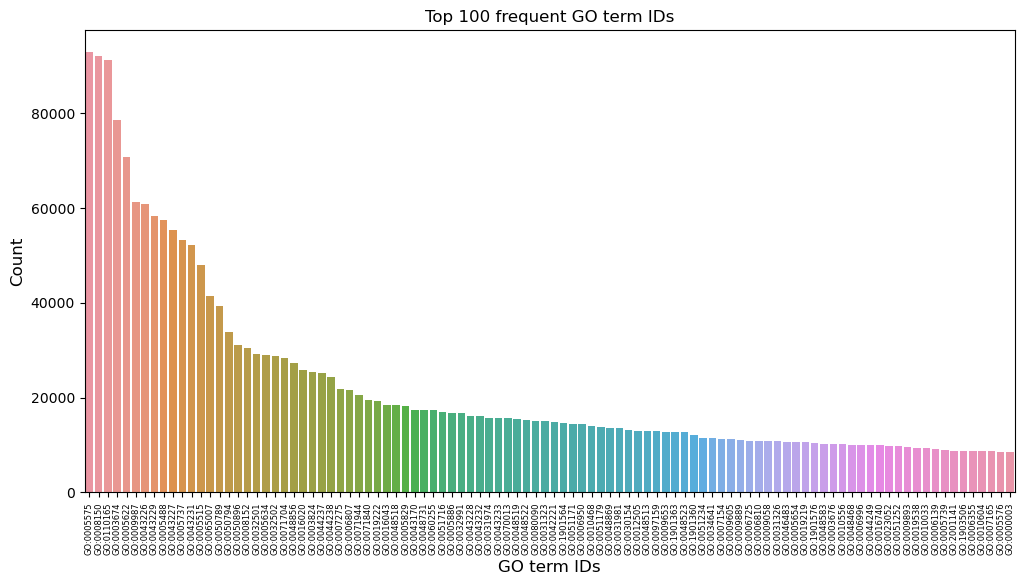

In [75]:
plot_df = df['term'].value_counts().iloc[:100]

figure, axis = plt.subplots(1, 1, figsize=(12, 6))

bp = sns.barplot(ax=axis, x=np.array(plot_df.index), y=plot_df.values)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)
axis.set_title('Top 100 frequent GO term IDs')
bp.set_xlabel("GO term IDs", fontsize = 12)
bp.set_ylabel("Count", fontsize = 12)
plt.show()

In [77]:


# Set the limit for label
num_of_labels = 1500

# Take value counts in descending order and fetch first 1500 `GO term ID` as labels
labels = df['term'].value_counts().index[:num_of_labels].tolist()



In [79]:
labels
#Here, we saved the most frequently occuring GO ID'S in a list
# Top 1500 most frequently occuring one's

['GO:0005575',
 'GO:0008150',
 'GO:0110165',
 'GO:0003674',
 'GO:0005622',
 'GO:0009987',
 'GO:0043226',
 'GO:0043229',
 'GO:0005488',
 'GO:0043227',
 'GO:0005737',
 'GO:0043231',
 'GO:0005515',
 'GO:0065007',
 'GO:0050789',
 'GO:0050794',
 'GO:0050896',
 'GO:0008152',
 'GO:0032501',
 'GO:0005634',
 'GO:0032502',
 'GO:0071704',
 'GO:0048856',
 'GO:0016020',
 'GO:0003824',
 'GO:0044237',
 'GO:0044238',
 'GO:0007275',
 'GO:0006807',
 'GO:0071944',
 'GO:0071840',
 'GO:0019222',
 'GO:0016043',
 'GO:0048518',
 'GO:0005829',
 'GO:0043170',
 'GO:0048731',
 'GO:0060255',
 'GO:0051716',
 'GO:0005886',
 'GO:0032991',
 'GO:0043228',
 'GO:0043232',
 'GO:0031974',
 'GO:0043233',
 'GO:0070013',
 'GO:0048519',
 'GO:0048522',
 'GO:0080090',
 'GO:0031323',
 'GO:0042221',
 'GO:1901564',
 'GO:0051171',
 'GO:0006950',
 'GO:0010468',
 'GO:0051179',
 'GO:0048869',
 'GO:0031981',
 'GO:0030154',
 'GO:0012505',
 'GO:0048513',
 'GO:0097159',
 'GO:0009653',
 'GO:1901363',
 'GO:0048523',
 'GO:1901360',
 'GO:00512

In [81]:


# Fetch the train_terms data for the relevant labels only
train_terms_updated = df.loc[df['term'].isin(labels)]



In [82]:
train_terms_updated

,EntryID,term,aspect,Seq
0,A0A009IHW8,GO:0008152,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
1,A0A009IHW8,GO:0034655,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
3,A0A009IHW8,GO:0044270,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
4,A0A009IHW8,GO:0006753,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
6,A0A009IHW8,GO:0044237,BPO,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
...,...,...,...,...
5363858,X5E0F1,GO:0005515,MFO,MNKKTKLIHGGHTTDDYTGAVTTPIYQTSTYLQDDIGDLRQGYEYS...
5363859,X5E0F1,GO:0003674,MFO,MNKKTKLIHGGHTTDDYTGAVTTPIYQTSTYLQDDIGDLRQGYEYS...
5363860,X5HMX4,GO:0005515,MFO,MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...
5363861,X5HMX4,GO:0005488,MFO,MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...


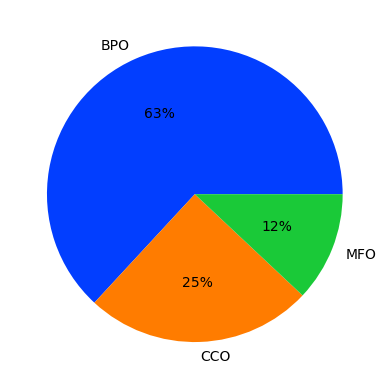

In [83]:
pie_df = train_terms_updated['aspect'].value_counts()
palette_color = sns.color_palette('bright')
plt.pie(pie_df.values, labels=np.array(pie_df.index), colors=palette_color, autopct='%.0f%%')
plt.show()


In [90]:
# Setup progressbar settings.
# This is strictly for aesthetic.
bar = progressbar.ProgressBar(maxval=num_of_labels, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

# Create an empty dataframe of required size for storing the labels,
# i.e, train_size x num_of_labels (142246 x 1500)
train_size = train_protein_ids.shape[0] # len(X)
train_labels = np.zeros((train_size ,num_of_labels))

# Convert from numpy to pandas series for better handling
series_train_protein_ids = pd.Series(train_protein_ids)

# Loop through each label
for i in range(num_of_labels):
    # For each label, fetch the corresponding train_terms data
    n_train_terms = train_terms_updated[train_terms_updated['term'] ==  labels[i]]
    
    # Fetch all the unique EntryId aka proteins related to the current label(GO term ID)
    label_related_proteins = n_train_terms['EntryID'].unique()
    
    # In the series_train_protein_ids pandas series, if a protein is related
    # to the current label, then mark it as 1, else 0.
    # Replace the ith column of train_Y with with that pandas series.
    train_labels[:,i] =  series_train_protein_ids.isin(label_related_proteins).astype(float)
    
    # Progress bar percentage increase
    bar.update(i+1)

# Notify the end of progress bar 
bar.finish()

# Convert train_Y numpy into pandas dataframe
labels_df = pd.DataFrame(data = train_labels, columns = labels)
print(labels_df.shape)

[========================================================================] 100%


(142246, 1500)



    Creating a Checklist (List of GO IDs):
        You started by making a list of the most common Gene Ontology (GO) term IDs (jobs) that are associated with proteins in your dataset. This list has 1500 GO IDs.

    Making a Binary Matrix (Training Data):
        Then, you created a binary matrix (like a checklist) for each protein in your training dataset. This matrix indicates the presence or absence of each GO ID for each protein. If a protein has a particular GO ID, it gets a checkmark (1); otherwise, it doesn't (0). This matrix is based on features like the amino acid sequence of the proteins.

    Training the Smart Machine:
        Using this binary matrix, you trained a machine learning model (the smart machine) to understand patterns between protein features (like amino acid sequences) and the associated GO IDs.

    Predicting with Test Data:
        Now, you have a trained model. You can use this model to predict the GO IDs for new proteins in your test dataset. The model looks at the features of the new proteins and tries to match them with the patterns it learned during training.

In essence, you've set up a system that learns from known examples (training data) and then applies this knowledge to make educated guesses about the functions of new proteins (test data) based on their features. This is a common approach in machine learning, especially for tasks like predicting the functions of biological molecules.

In [89]:
import progressbar


In [88]:
!pip install progressbar2


  Obtaining dependency information for python-utils>=3.0.0 from https://files.pythonhosted.org/packages/f0/7b/e83e7b184e53530abe064b237a3731c738d3cb59f4201f3ce1a4ec0efe6f/python_utils-3.8.1-py2.py3-none-any.whl.metadata


In [94]:
INPUT_SHAPE = [train_df.shape[1]]
BATCH_SIZE = 5120

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=INPUT_SHAPE),    
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=num_of_labels,activation='sigmoid')
])


# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC()],
)

history = model.fit(
    train_df, labels_df,
    batch_size=BATCH_SIZE,
    epochs=5
)


Epoch 1/5
28/28 [==============================] - 10s 322ms/step - loss: 0.1917 - binary_accuracy: 0.9432 - auc: 0.6880
Epoch 2/5
28/28 [==============================] - 9s 335ms/step - loss: 0.0781 - binary_accuracy: 0.9801 - auc: 0.8325
Epoch 3/5
28/28 [==============================] - 9s 332ms/step - loss: 0.0739 - binary_accuracy: 0.9802 - auc: 0.8597
Epoch 4/5
28/28 [==============================] - 9s 311ms/step - loss: 0.0702 - binary_accuracy: 0.9805 - auc: 0.8831
Epoch 5/5
28/28 [==============================] - 9s 304ms/step - loss: 0.0672 - binary_accuracy: 0.9807 - auc: 0.9007


In [92]:
!pip install tensorflow

In [93]:
import tensorflow as tf

<Axes: title={'center': 'Accuracy'}>

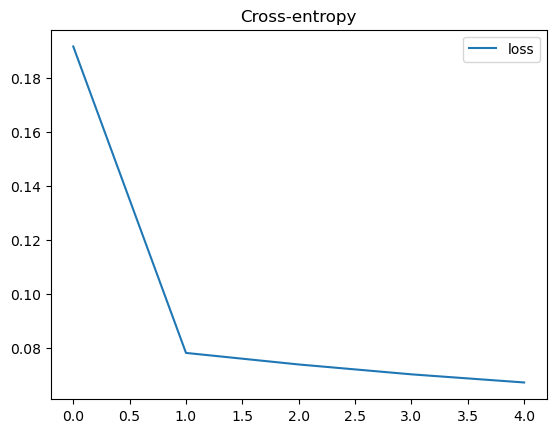

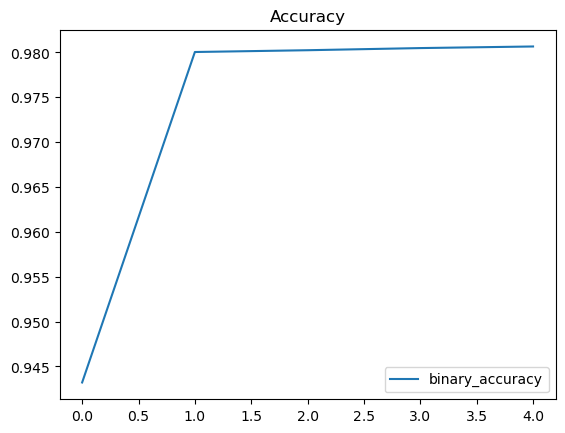

In [95]:


history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy']].plot(title="Accuracy")



In [96]:
test_embeddings = np.load('test_embeds.npy')

# Convert test_embeddings to dataframe
column_num = test_embeddings.shape[1]
test_df = pd.DataFrame(test_embeddings, columns = ["Column_" + str(i) for i in range(1, column_num+1)])
print(test_df.shape)


(141865, 1024)


In [97]:
test_df.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_1015,Column_1016,Column_1017,Column_1018,Column_1019,Column_1020,Column_1021,Column_1022,Column_1023,Column_1024
0,0.054705,0.063420,-0.015320,-0.016506,0.042195,0.021592,-0.118535,-0.063298,-0.046146,-0.102311,...,-0.019581,-0.043712,-0.072322,0.002404,0.018459,-0.047278,0.012195,-0.043319,0.036009,0.063093
1,0.090373,0.089842,-0.023887,-0.011446,0.051465,0.020982,-0.110989,-0.066646,-0.041259,-0.087551,...,-0.024399,-0.041957,-0.066329,0.006856,0.028449,-0.053758,0.009699,-0.053350,0.019644,0.079630
2,0.043588,0.039572,-0.014332,-0.011769,0.045109,0.015847,-0.103339,-0.047735,-0.022730,-0.091452,...,-0.029648,-0.037944,-0.046043,0.003603,0.018028,-0.030746,0.003671,-0.044464,0.030974,0.040322
3,0.055668,0.049560,-0.019646,-0.006977,0.039897,0.021177,-0.108079,-0.047191,-0.031517,-0.100057,...,-0.023210,-0.041704,-0.048440,0.006088,0.020110,-0.046751,-0.006635,-0.041455,0.016683,0.057030
4,0.022637,0.014306,-0.002696,-0.034456,0.034854,0.020822,-0.114046,-0.050019,-0.026491,-0.097928,...,-0.019185,-0.032108,-0.051394,0.008448,0.015208,-0.037987,0.030977,-0.042407,0.041232,0.047161


In [98]:
predictions =  model.predict(test_df)

4434/4434 [==============================] - 7s 2ms/step


In [100]:

df_submission = pd.DataFrame(columns = ['Protein Id', 'GO Term Id','Prediction'])
test_protein_ids = np.load('test_ids.npy')
l = []
for k in list(test_protein_ids):
    l += [ k] * predictions.shape[1]   

df_submission['Protein Id'] = l
df_submission['GO Term Id'] = labels * predictions.shape[0]
df_submission['Prediction'] = predictions.ravel()
df_submission.to_csv("submission.tsv",header=False, index=False, sep="\t")

In [101]:
df_submission


,Protein Id,GO Term Id,Prediction
0,Q9CQV8,GO:0005575,0.517599
1,Q9CQV8,GO:0008150,0.525333
2,Q9CQV8,GO:0110165,0.517324
3,Q9CQV8,GO:0003674,0.499082
4,Q9CQV8,GO:0005622,0.509618
...,...,...,...
212797495,A0A3G2FQK2,GO:0051783,0.287838
212797496,A0A3G2FQK2,GO:0001818,0.335965
212797497,A0A3G2FQK2,GO:0031674,0.323487
212797498,A0A3G2FQK2,GO:0006874,0.323610
